Que. We want predict Passenger ticket sales

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Import the data
air_data = pd.read_excel("/content/Airlines+Data.xlsx")
air_data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [9]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [12]:
#Check in the statistics
air_data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


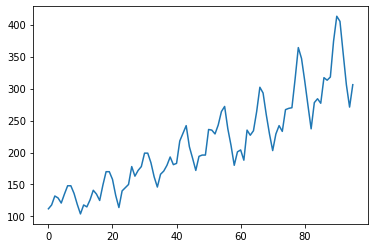

In [15]:
#Performing the basic visualization
air_data.Passengers.plot()

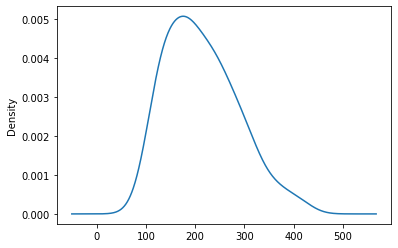

In [19]:
air_data.Passengers.plot(kind='kde')

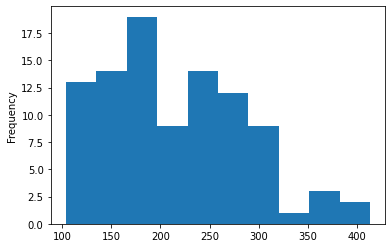

In [21]:
air_data.Passengers.plot(kind='hist')

In [23]:
v=pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True,squeeze=True)

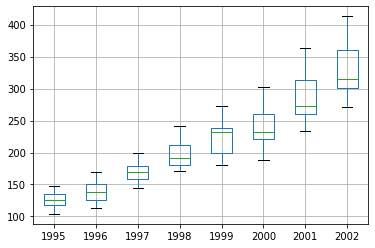

In [28]:
#Box plot to visualize the passengers in airlines for each year
group=v.groupby(pd.Grouper(freq='A'))
years=pd.DataFrame()
for i,j in group:
    years[i.year]=j.values
years.boxplot()
plt.show()

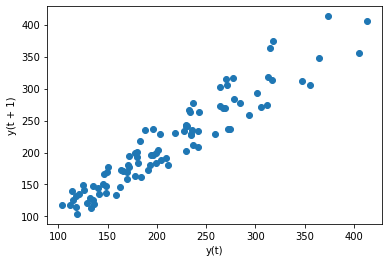

In [33]:
#Lag plot - plot between lagges values of airline passengers and lagged time
lag_plot(v)

In [37]:
#Performing the data driven methods on data
# Splitting data
train = air_data.head(77)
test = air_data.tail(19)


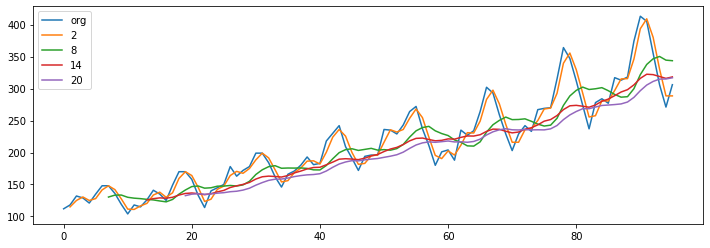

In [42]:
#Moving Average and time decomposition plot
plt.figure(figsize=(12,4))
air_data.Passengers.plot(label="org")
for i in range(2,24,6):
    air_data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

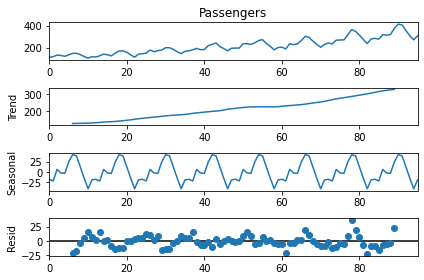

In [46]:
decompose_ts_add = seasonal_decompose(air_data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

In [47]:
#ACF plots and PACF plots

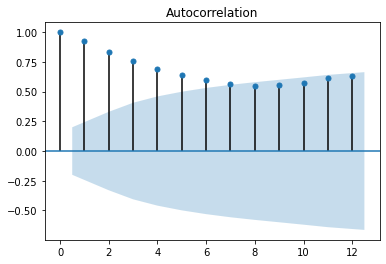

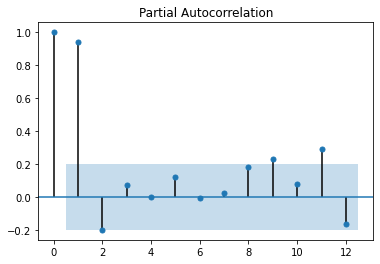

In [52]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(air_data.Passengers,lags=12)
tsa_plots.plot_pacf(air_data.Passengers,lags=12)
plt.show()

In [57]:
#Evaluation metric RMSE
def RMSE(pred,org):
    temp = (np.sqrt(np.mean((np.array(org)-np.array(pred))**2)))
    return temp

In [62]:
#Prepare the model of simple exponential method
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_ses,test.Passengers) 

80.54332901444305

In [64]:
# Buildthe model of Holt method
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_hw,test.Passengers) 

47.877728640303836

In [71]:
#Build the model of Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_hwe_add_add,test.Passengers) 

35.89148606488649

In [77]:
#Developing the model of Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_hwe_mul_add,test.Passengers)

30.903498240372365

In [83]:
#Final model 
hwe_model_mul_add_new = ExponentialSmoothing(air_data["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [90]:
#Forecasting for next 10 time periods
hwe_model_mul_add_new.forecast(10)

96     312.899768
97     308.171843
98     355.533483
99     345.770653
100    345.697050
101    392.471899
102    436.502735
103    429.860677
104    380.174322
105    332.318746
dtype: float64


From the above models, the model with the lowest RMSE value is holts winter exponential smoothing with multiplicative seasonality and additive trend. Thus, we use it to forecast the airlines passengers using the same model